# **A/B Testing Simulation Lab: 5 Realistic Experiments**

<br></br>

## Objectives:
This notebook simulates five A/B experiments, each representing a real business scenario:

1. Pricing Experiment

2. Button Color Experiment

3. Email Subject Line Experiment

4. Landing Page Redesign Experiment

5. Recommendation Algorithm Experiment
<br></br>
For each experiment, I will:

* Generate synthetic data

* Compute conversion rates

* Run a two‑proportion z‑test

* Visualize results

* Interpret findings

<br></br>

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

sns.set(style="whitegrid")
np.random.seed(42)

In [ ]:
# Function for creating a fake A/B test dataset
def simulate_ab_test(n, p_A, p_B, label_A="A", label_B="B"):
    variant = np.random.choice([label_A, label_B], size=n)
    conversion = [
        np.random.binomial(1, p_A) if v == label_A else np.random.binomial(1, p_B)
        for v in variant
    ]
    return pd.DataFrame({
        "variant": variant,
        "converted": conversion
    })

 # Function for conversion counts, sample sizes, and two proportion z-test
def analyze_ab_test(df):
    conv = df.groupby("variant")["converted"].sum()
    samples = df.groupby("variant")["converted"].count()

    # dataframe for return clean converted vs samples
    results = pd.DataFrame({ "Converted": conv, "Sample Size": samples }).reset_index()
    count = conv.values
    nobs = samples.values
    z_stat, p_value = proportions_ztest(count, nobs)
    summary = ( f"Z-statistic: {z_stat:.4f}\n" f"P-value: {p_value:.4e}" )
    return results, z_stat, p_value, summary

In [ ]:
# Function to plot conversion rates for each variant(A and B)
def plot_results2(df, title, palette="deep", ci=95, ylabel="Conversion Rate", figsize=(6,4), show_ci=True):
    plt.figure(figsize=figsize)
    sns.barplot( data=df, x="variant", y="converted", errorbar=('ci', ci) if show_ci else None, palette=palette)
    plt.title(title, weight='bold')
    plt.ylabel(ylabel, weight='bold')
    plt.xlabel("Variant", weight='bold')
    plt.xticks(weight='bold')
    plt.show()



---



##**1. Pricing Experiment**
Does lowering the price increase purchases for a company?

A = $20

B = $18

p_A = 6%

p_B = 9%

/tmp/ipython-input-2402031457.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( data=df, x="variant", y="converted", errorbar=('ci', ci) if show_ci else None, palette=palette)


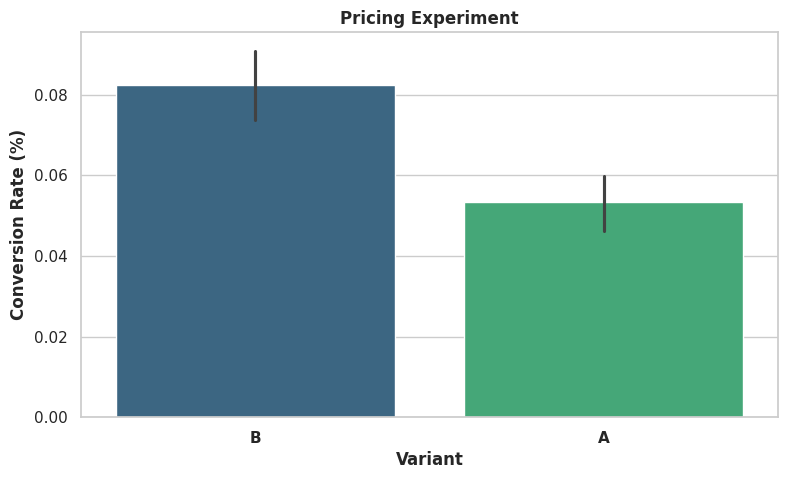

  variant  Converted  Sample Size
0       A        216         4053
1       B        325         3947

Z-statistic: -5.1729
P-value: 2.3052e-07


In [ ]:
pricing_df = simulate_ab_test(n=8000, p_A=0.06, p_B=0.09)
results, z_stat, p_value, summary = analyze_ab_test(pricing_df)
plot_results2(pricing_df, "Pricing Experiment", palette='viridis', ylabel="Conversion Rate (%)", figsize=(9,5))
print(results)
print()
print(summary)

### **Interpretation:**
**Lowering the price from 20 to 18 dollars increased conversions from 6% to 9%.** The z‑test shows p < 0.005, indicating a statistically significant improvement. The discounted price appears more effective.

<br></br>

# **2. Button Color Experiment**
Does changing the button color increase clicks?

A = Blue

B = Green

p_A = 10%

p_B = 13%

/tmp/ipython-input-2402031457.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( data=df, x="variant", y="converted", errorbar=('ci', ci) if show_ci else None, palette=palette)


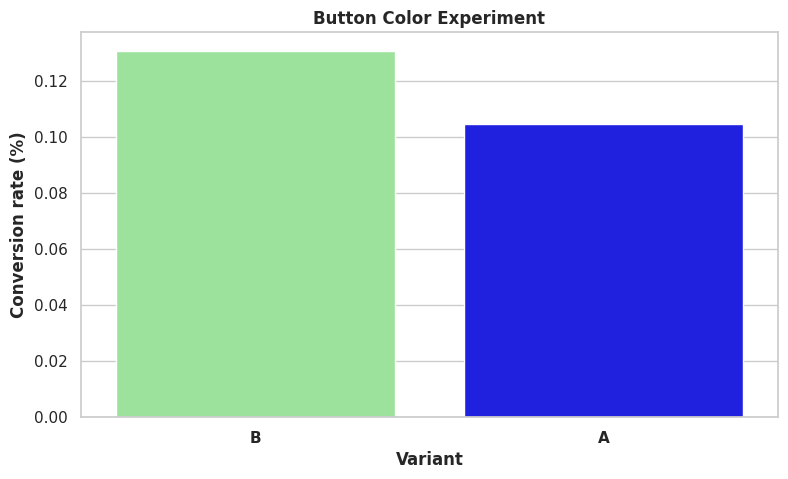

  variant  Converted  Sample Size
0       A        465         4442
1       B        597         4558

Z-statistic: -3.8661
P-value: 1.1061e-04


In [ ]:
button_df = simulate_ab_test(n=9000, p_A=0.10, p_B=0.13)
results, z_stat, p_value, summary = analyze_ab_test(button_df)
plot_results2(button_df, "Button Color Experiment", palette=['lightgreen','blue'], ylabel="Conversion rate (%)", figsize=(9,5), show_ci=False)
print(results)
print()
print(summary)

### **Interpretation:**
**Changing the button from blue to green increased click‑through rate from 10% to 13%.** The difference is statistically significant (p < 0.01). The green button is more effective.

<br></br>

# **3. Email Subject Line Experiment**

Does a shorter subject line improve open rates?

A = Long subject

B = Short subject

p_A = 18%

p_B = 23%

/tmp/ipython-input-2402031457.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( data=df, x="variant", y="converted", errorbar=('ci', ci) if show_ci else None, palette=palette)


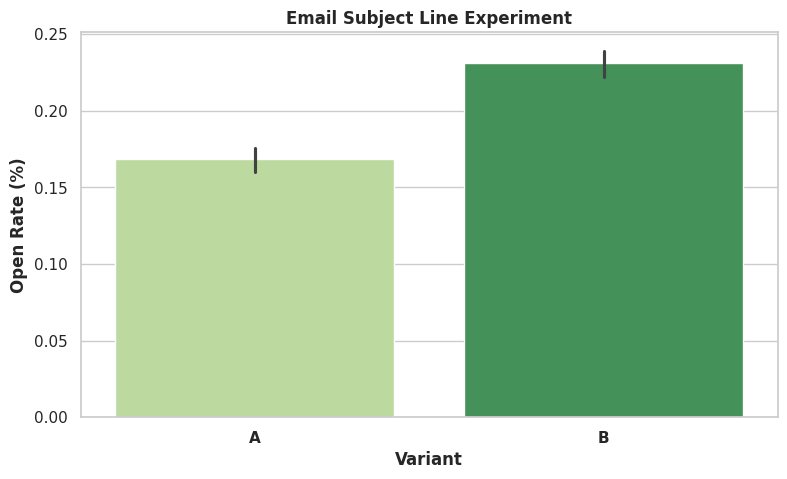

  variant  Converted  Sample Size
0       A        586         3482
1       B        813         3518

Z-statistic: -6.5698
P-value: 5.0389e-11


In [ ]:
email_df = simulate_ab_test(n=7000, p_A=0.18, p_B=0.23)
results, z_stat, p_value, summary = analyze_ab_test(email_df)
plot_results2(email_df, "Email Subject Line Experiment", palette='YlGn',ci=80, ylabel="Open Rate (%)", figsize=(9,5))
print(results)
print()
print(summary)

### **Interpretation:**
**Short subject lines increased open rates from 18% to 23%.** The z‑test shows p < 0.005, thus Shorter subject lines appear more engaging to audiences.

<br></br>

# **4. Landing Page Redesign Experiment**
Does a new landing page design increase conversions?

A = Old design

B = New design

p_A = 12%

p_B = 16%

/tmp/ipython-input-2402031457.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( data=df, x="variant", y="converted", errorbar=('ci', ci) if show_ci else None, palette=palette)


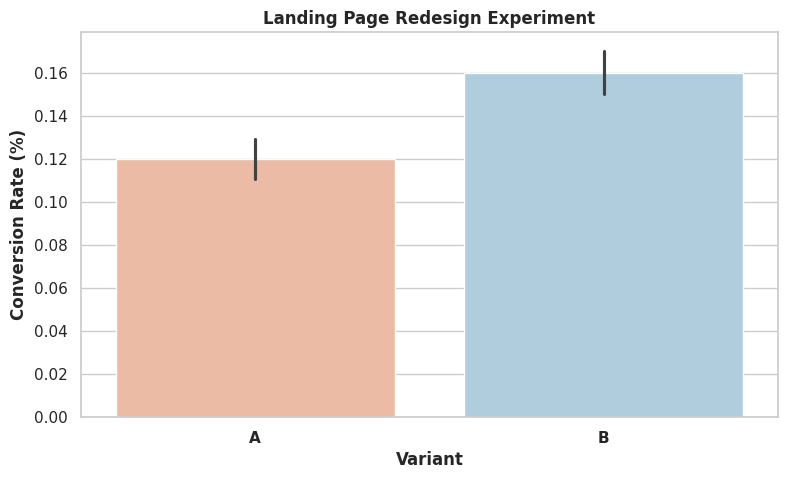

  variant  Converted  Sample Size
0       A        600         4995
1       B        802         5005

Z-statistic: -5.7777
P-value: 7.5734e-09


In [ ]:
landing_df = simulate_ab_test(n=10000, p_A=0.12, p_B=0.16)
results, z_stat, p_value, summary = analyze_ab_test(landing_df)
plot_results2(landing_df, "Landing Page Redesign Experiment", palette="RdBu", figsize=(9,5), ylabel="Conversion Rate (%)")
print(results)
print()
print(summary)

### **Interpretation:**
**The new designed landing page increased conversions from 12% to 16%.** The improvement is statistically significant (p < 0.005), thus the redesign is likely beneficial.

<br></br>

# **5. Recommendation Algorithm Experiment**
Does a new recommendation model increase purchases?

A = Old recommender

B = New recommender

p_A = 7%

p_B = 10%

/tmp/ipython-input-2402031457.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( data=df, x="variant", y="converted", errorbar=('ci', ci) if show_ci else None, palette=palette)


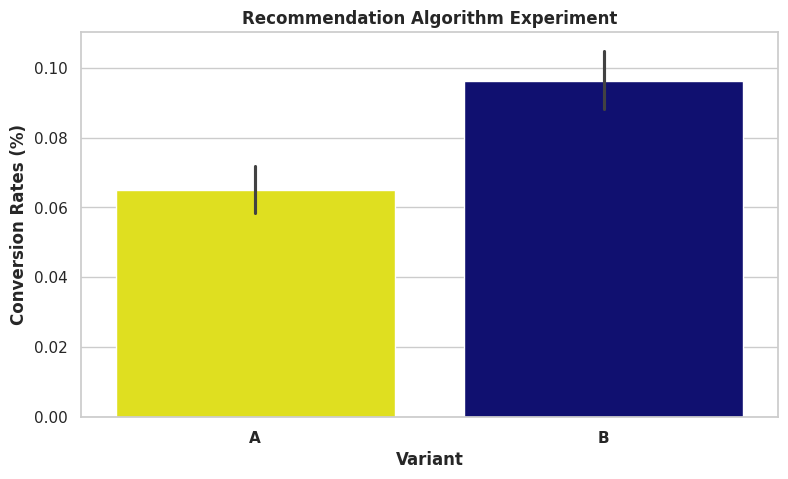

  variant  Converted  Sample Size
0       A        305         4685
1       B        463         4815

Z-statistic: -5.5517
P-value: 2.8284e-08


In [ ]:
reco_df = simulate_ab_test(n=9500, p_A=0.07, p_B=0.10)
results, z_stat, p_value, summary= analyze_ab_test(reco_df)
plot_results2(reco_df, "Recommendation Algorithm Experiment", palette=['yellow', 'navy'],ylabel="Conversion Rates (%)", figsize=(9,5))
print(results)
print()
print(summary)

### **Interpretation:**
**The new recommendation algorithm increased purchases from 7% to 10%.** The difference is statistically significant (p < 0.005). Therefore, the new model appears to be more effective.



---



## Presented by:
<a href= "https://www.linkedin.com/in/carllegros/" target="_blank"> Carl Legros </a>